In [125]:
import sys
sys.path.append("..")
from fixed_point.fixed_point import fixed_point
import sympy as sp
from sympy.plotting import plot as symplot
import pandas as pd
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
from IPython.display import Math, Latex, Markdown

In [126]:
# Definimos la función de la cual queremos buscar las raíces

r = sp.symbols('r')
E = (1 /(2*r**2) - (5 / r) - 1)
E = sp.lambdify(r, E)

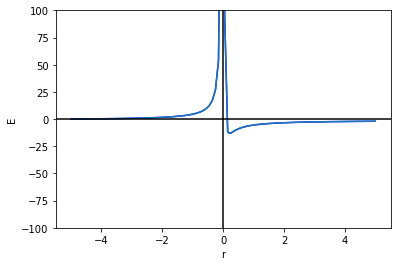

In [127]:
# Representamos los valores de la energía para ver por dónde pueden encontrarse las raíces

x_vals = linspace(-5, 5, 100)
y_vals = E(x_vals)

plt.plot(x_vals, y_vals, color="b")
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")
plt.ylim([-100, 100])
plt.ylabel("E")
plt.xlabel("r")
plt.show()

## Solución con el método del punto fijo

## Primera raíz ($p_1$)

In [196]:
g1 = g = (1 - 2 * r**2) / 10
g1 = sp.lambdify(r, g1)

In [197]:
# Parametros del método del punto fijo. aproximación inicial, tolerancia y numero de iteraciones
p0 = 2
tol = 1e-5
N0 = 20

In [198]:
p1, data1, convergence = fixed_point(g1, p0, tol, N0)

In [199]:
# Tabulate the data            
pd.set_option('display.precision', 10)
data1 = pd.DataFrame({'$p_n$':data1['p0_matrix'],
                     '$g(p_n)$' : data1['gp0_matrix'],
                     '$Error (|p_n - p_{n-1}|)$': data1['error_matrix']
                      })

data1.index = np.arange(1, len(data1) + 1, 1)
data1.index.name = '$n$'
data1 = data1[['$p_n$','$g(p_n)$', '$Error (|p_n - p_{n-1}|)$' ]]

In [200]:
if convergence:
    print('Raíz: {} con punto inicial: {} y tolerancia {} después de  {} iteraciones.'.format(p1, p0, tol, len(data1)))
    print('')
    display(data1)
else:
    print(p1)

Raíz: 0.09807609415468403 con punto inicial: 2 y tolerancia 1e-05 después de  6 iteraciones.



,$p_n$,$g(p_n)$,$Error (|p_n - p_{n-1}|)$
$n$,,,
1,2.0000000000,-0.7000000000,2.7000000000
2,-0.7000000000,0.0020000000,0.7020000000
3,0.0020000000,0.0999992000,0.0979992000
4,0.0999992000,0.0980000320,0.0019991680
5,0.0980000320,0.0980791987,0.0000791667
6,0.0980791987,0.0980760942,0.0000031046


In [201]:
# Guardamos los datos tabulados como un archivo de latex
data1.to_latex("latex/fixed-point/fixed-point_raiz1.tex")
data1.to_csv("csv/fixed-point/fixed-point_raiz1.csv", index = None, header = True)

## Segunda raíz ($p_2$)

In [112]:
g2 =  1 / (2*r) - 5
g2 = sp.lambdify(r, g2)

In [113]:
# Parametros del método del punto fijo. aproximación inicial, tolerancia y numero de iteraciones
p0 = -4
tol = 1e-5
N0 = 20

In [114]:
p2, data2, convergence = fixed_point(g2, p0, tol, N0)

In [115]:
# Tabulate the data            
pd.set_option('display.precision', 10)
data2 = pd.DataFrame({'$p_0$':data2['p0_matrix'],
                     '$g(p_0)$' : data2['gp0_matrix'],
                     '$Error (|p - p_0|)$': data2['error_matrix']
                      })

data2.index = np.arange(1, len(data2) + 1, 1)
data2.index.name = '$n$'
data2 = data2[['$p_0$','$g(p_0)$', '$Error (|p - p_0|)$' ]]

In [116]:
if convergence:
    print('Raíz: {} con punto inicial: {} y tolerancia {} después de  {} iteraciones.'.format(p2, p0, tol, len(data2)))
    print('')
    display(data2)
else:
    print(p2)

Raíz: -5.0980762150220915 con punto inicial: -4 y tolerancia 1e-05 después de  5 iteraciones.



,$p_0$,$g(p_0)$,$Error (|p - p_0|)$
$n$,,,
1,-4.0000000000,-5.1250000000,1.1250000000
2,-5.1250000000,-5.0975609756,0.0274390244
3,-5.0975609756,-5.0980861244,0.0005251488
4,-5.0980861244,-5.0980760206,0.0000101038
5,-5.0980760206,-5.0980762150,0.0000001944


In [117]:
# Guardamos los datos tabulados como un archivo de latex
data2.to_latex("latex/fixed-point/fixed-point_raiz2.tex")

## Accelerated fixed point iteration with Steffensen method

### Primera raíz ($p_1$)

In [202]:
from aitken.steffensen import steffensen

In [203]:
g1 = g = (1 - 2 * r**2) / 10
g1 = sp.lambdify(r, g1)

In [204]:
# Parametros del método del punto fijo. aproximación inicial, tolerancia y numero de iteraciones
p0 = 2
tol = 1e-5
N0 = 20

In [205]:
phat, data3, convergence = steffensen(g1, p0, tol, N0)

In [206]:
# Tabulate the data            
pd.set_option('display.precision', 10)
if len(data3['phat_matrix']) < len(data3['p0_matrix']):
    data3['phat_matrix'].append("")
data3 = pd.DataFrame({'$p_0$':data3['p0_matrix'],
                     '$\hat{p}$' : data3['phat_matrix'],
                     '$Error (|p - p_0|)$': data3['error_matrix']
                      })

data3.index = np.arange(1, len(data3) + 1, 1)
data3.index.name = '$n$'
data3 = data3[['$p_0$','$\hat{p}$', '$Error (|p - p_0|)$' ]]

In [207]:
if convergence:
    print('Raíz: {} con punto inicial: {} y tolerancia {} después de  {} iteraciones.'.format(phat, p0, tol, len(data3)))
    print('')
    display(data3)
else:
    print(phat)

Raíz: 0.09807621135331594 con punto inicial: 2 y tolerancia 1e-05 después de  4 iteraciones.



,$p_0$,$\hat{p}$,$Error (|p - p_0|)$
$n$,,,
1,2.0000000000,-0.1428571429,2.1428571429e+00
2,-0.1428571429,0.09818117606,2.4103831891e-01
3,0.0981811761,0.09807621127,1.0496478500e-04
4,0.0980762113,,8.3224691028e-11


In [208]:
# Guardamos los datos tabulados como un archivo de latex
data3.to_latex("latex/fixed-point/fixed-point_raiz1_aitken.tex")
data3.to_csv("csv/fixed-point/fixed-point_raiz1_aitken.csv", index = None, header = True)

### Segunda raíz ($p_2$)

In [209]:
g2 =  1 / (2*r) - 5
g2 = sp.lambdify(r, g2)

In [210]:
# Parametros del método del punto fijo. aproximación inicial, tolerancia y numero de iteraciones
p0 = -4
tol = 1e-5
N0 = 20

In [211]:
phat, data3, convergence = steffensen(g2, p0, tol, N0)

In [212]:
# Tabulate the data            
pd.set_option('display.precision', 10)
if len(data3['phat_matrix']) < len(data3['p0_matrix']):
    data3['phat_matrix'].append("")
data3 = pd.DataFrame({'$p_0$':data3['p0_matrix'],
                     '$\hat{p}$' : data3['phat_matrix'],
                     '$Error (|p - p_0|)$': data3['error_matrix']
                      })

data3.index = np.arange(1, len(data3) + 1, 1)
data3.index.name = '$n$'
data3 = data3[['$p_0$','$\hat{p}$', '$Error (|p - p_0|)$' ]]

In [213]:
if convergence:
    print('Raíz: {} con punto inicial: {} y tolerancia {} después de  {} iteraciones.'.format(phat, p0, tol, len(data3)))
    print('')
    display(data3)
else:
    print(phat)

Raíz: -5.098076211353315 con punto inicial: -4 y tolerancia 1e-05 después de  3 iteraciones.



,$p_0$,$\hat{p}$,$Error (|p - p_0|)$
$n$,,,
1,-4.0000000000,-5.098214286,1.0982142857e+00
2,-5.0982142857,-5.098076211,1.3807435961e-04
3,-5.0980762114,,1.3580248037e-12


In [214]:
# Guardamos los datos tabulados como un archivo de latex
data3.to_latex("latex/fixed-point/fixed-point_raiz2_aitken.tex")